### 1. Librairies à importer

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

### 2. Importer les données

In [34]:
data = pd.read_csv('car_price_prediction.csv')

### 3. Analyse exploratoire des données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

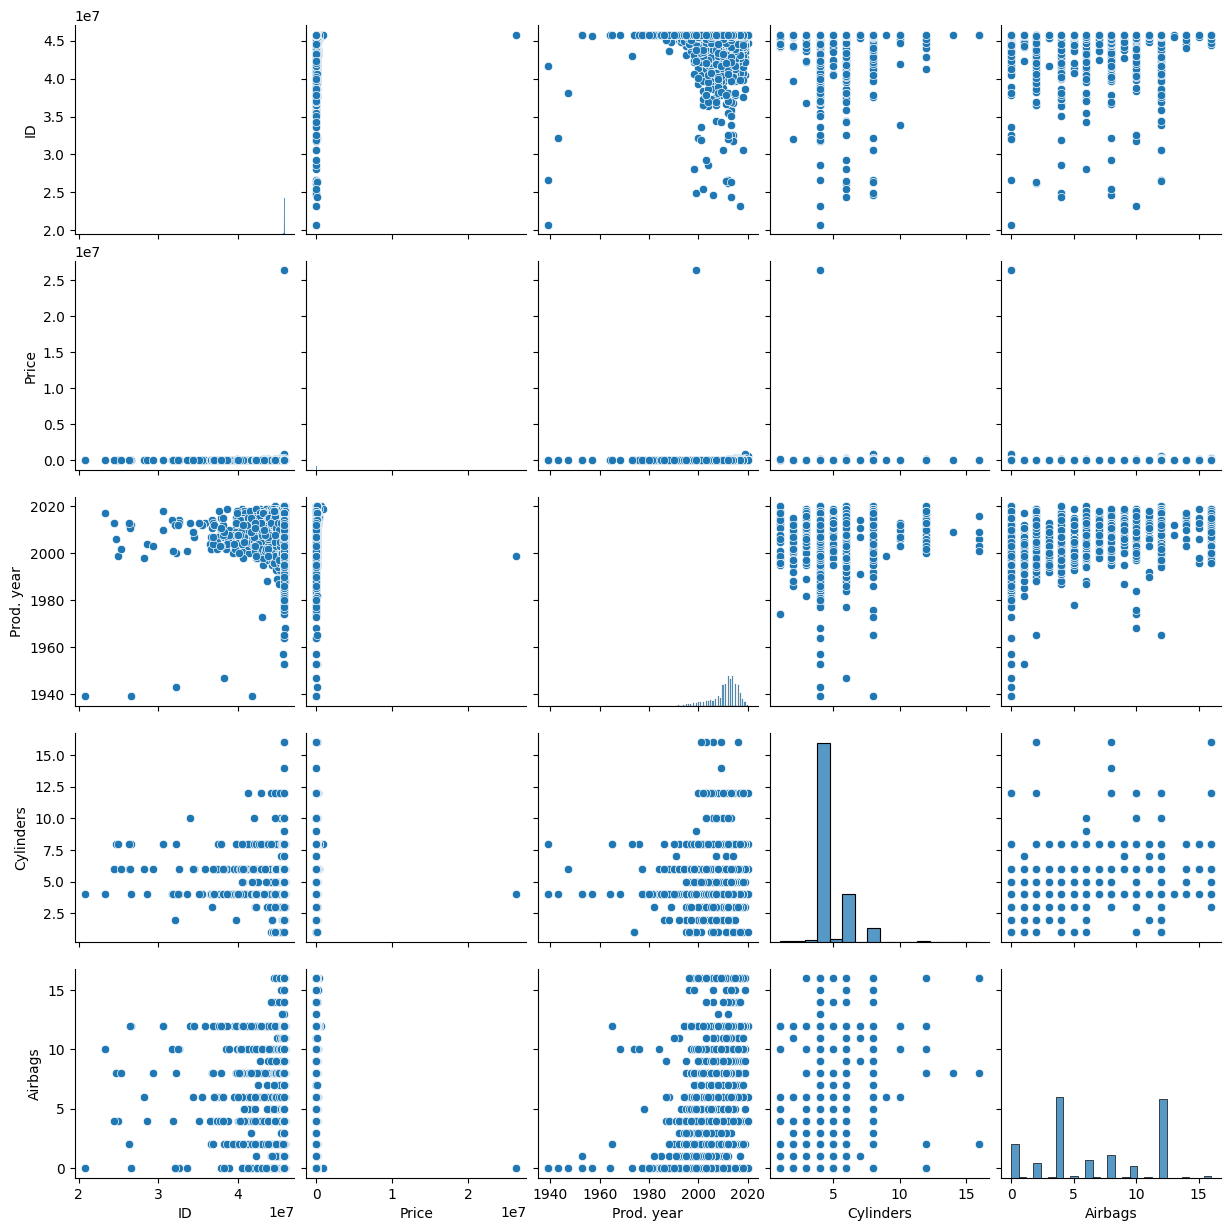

In [35]:
data.head()
data.describe()
data.info()
sns.pairplot(data)

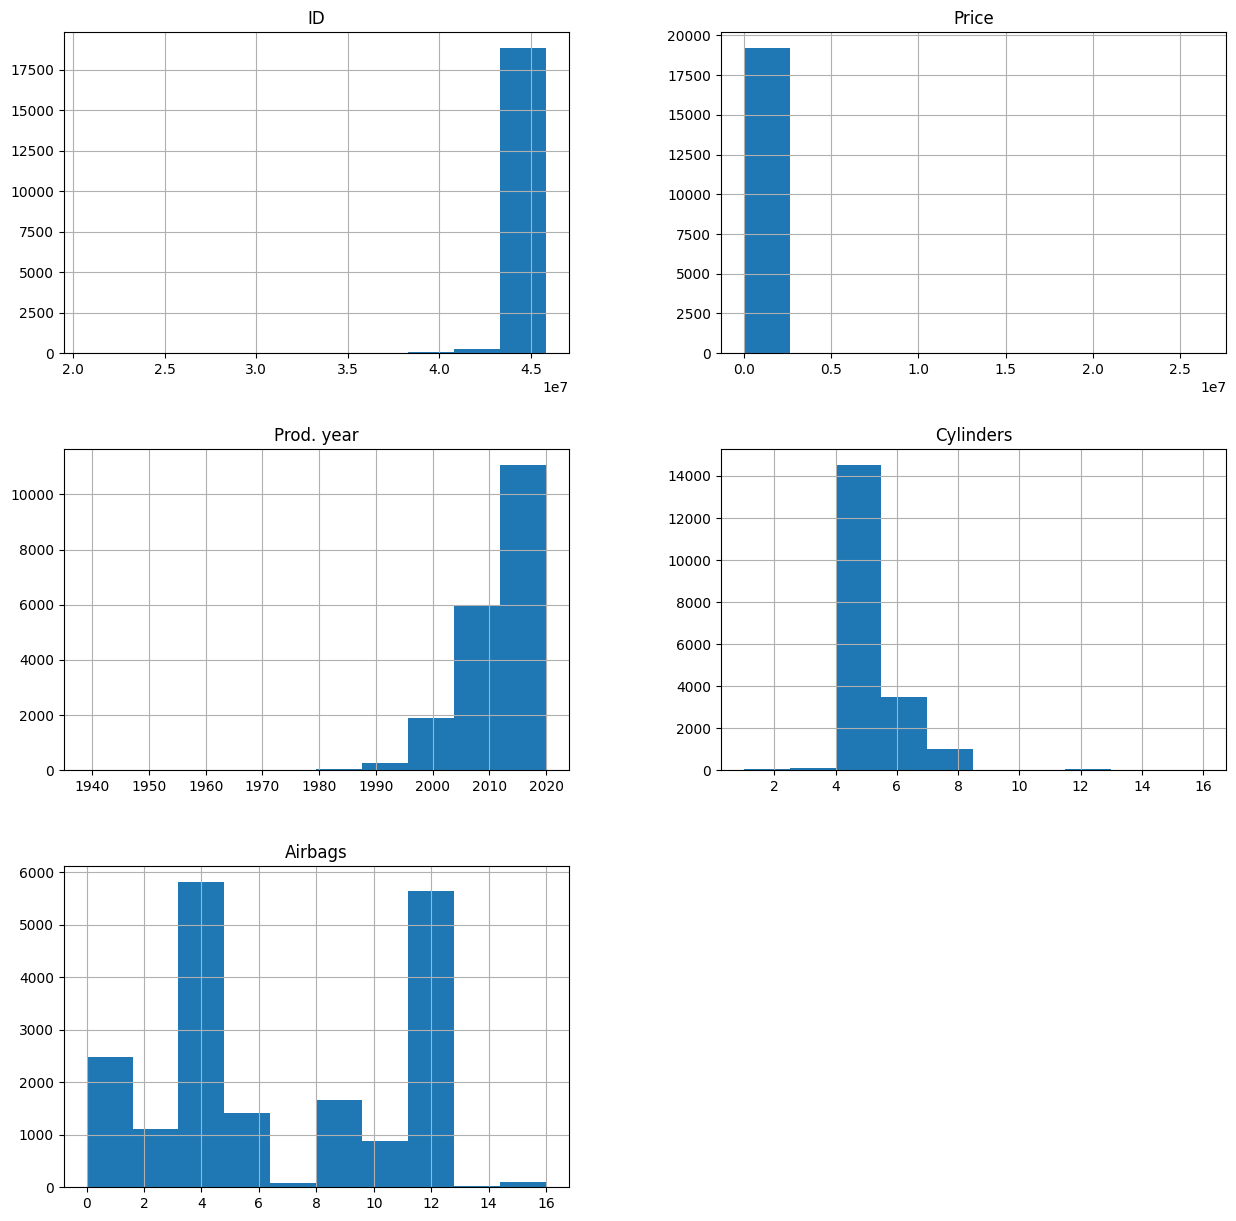

In [36]:
data.hist(figsize=(15,15));

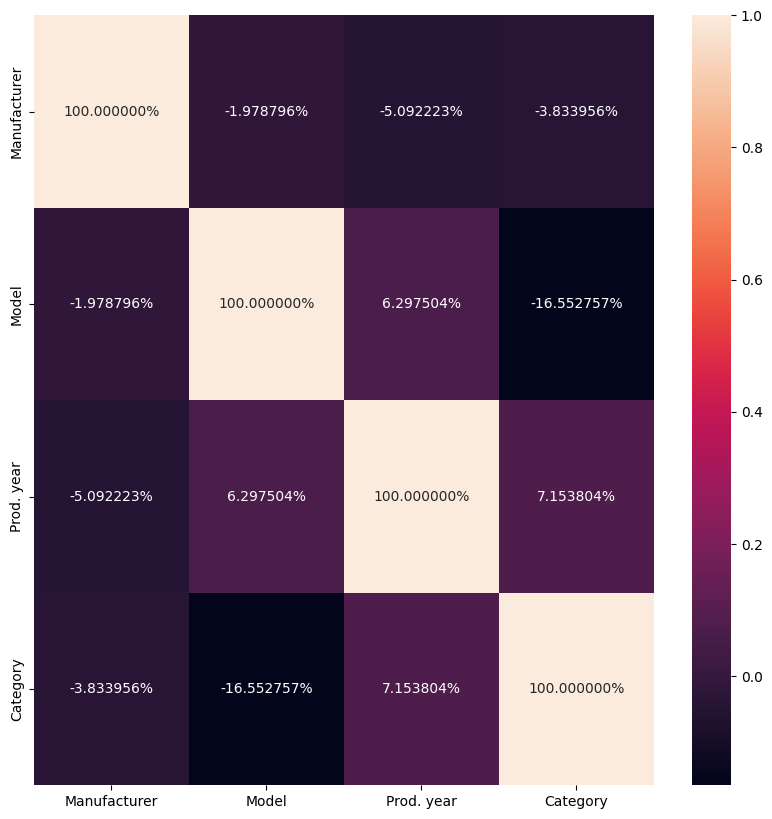

In [56]:
#Visualisation de la matrice de correlation
plt.figure(figsize=(10,10))
sns.heatmap(data.iloc[:,1:5].corr(), annot=True, fmt="0%");

### 4. Prétraitement des données

In [39]:
# Vérifier les valeurs manquantes
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [40]:
# Supprimer les colonnes inutiles
data.drop(['ID','Levy'], axis=1, inplace=True)

In [41]:
data

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [42]:
# Séparer les noms des marques et des modèles
#data[['brand','model']] = data['CarName'].str.split(' ',n=1,expand=True)

In [43]:
# Traitement de qualité des données
#data['model'].replace(['toyouta','vokswagen','vw'],'toyota', inplace=True)
#data['model'].replace(['porcshce','porcshe'],'porsche', inplace=True)
#data['model'].replace('Nissan','nissan', inplace=True)
#data['model'].replace('maxda','mazda', inplace=True)'''

In [44]:
# Supprimer la colonne CarName
#data.drop(['CarName'], axis=1, inplace=True)

In [45]:
data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [46]:

# Transformer les variables catégorielles en numériques
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Fuel type'] = labelencoder.fit_transform(data['Fuel type'])
data['Category'] = labelencoder.fit_transform(data['Category'])
data['Drive wheels'] = labelencoder.fit_transform(data['Drive wheels'])
data['Engine volume'] = labelencoder.fit_transform(data['Engine volume'])
data['Model'] = labelencoder.fit_transform(data['Model'])
data['Manufacturer'] = labelencoder.fit_transform(data['Manufacturer'])
data['Leather interior'] = labelencoder.fit_transform(data['Leather interior'])
data['Mileage'] = labelencoder.fit_transform(data['Mileage'])
data['Gear box type'] = labelencoder.fit_transform(data['Gear box type'])
data['Doors'] = labelencoder.fit_transform(data['Doors'])
data['Wheel'] = labelencoder.fit_transform(data['Wheel'])
data['Color'] = labelencoder.fit_transform(data['Color'])

In [47]:
data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,32,1242,2010,4,1,2,63,2838,6.0,0,0,1,0,12,12
1,16621,8,658,2011,4,0,5,56,2960,6.0,2,0,1,0,1,8
2,8467,21,684,2006,3,0,5,22,3140,4.0,3,1,1,1,1,2
3,3607,16,661,2011,4,1,2,46,2413,4.0,0,0,1,0,14,0
4,11726,21,684,2014,3,1,5,22,7396,4.0,0,1,1,0,12,4


In [48]:
# Créer de nouvelles variables et supprimer les anciennes
#data['enginesize-boreratio'] = data['enginesize'] * data['boreratio']
#data.drop(['enginesize', 'boreratio'], axis=1, inplace=True)

### 5. Diviser les données en ensemble de formation et ensemble de test

In [49]:
X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19232     8467
19233    15681
19234    26108
19235     5331
19236      470
Name: Price, Length: 19237, dtype: int64

In [50]:
X

,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,32,1242,2010,4,1,2,63,2838,6.0,0,0,1,0,12,12
1,8,658,2011,4,0,5,56,2960,6.0,2,0,1,0,1,8
2,21,684,2006,3,0,5,22,3140,4.0,3,1,1,1,1,2
3,16,661,2011,4,1,2,46,2413,4.0,0,0,1,0,14,0
4,21,684,2014,3,1,5,22,7396,4.0,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,36,385,1999,1,1,0,37,4394,4.0,1,2,0,0,12,5
19233,23,1334,2011,9,1,5,44,2214,4.0,2,1,1,0,11,8
19234,23,1442,2010,4,1,1,36,638,4.0,0,1,1,0,7,4
19235,8,456,2007,4,1,1,36,5612,4.0,0,1,1,0,1,4


### 6. Entraîner le modèle

In [57]:
# Créer un objet de régression linéaire
linear_regression_model = LinearRegression()

# Former le modèle sur les données d'entraînement
linear_regression_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = linear_regression_model.predict(X_test)

### 7. Evaluation du modèle

In [58]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(rmse)

417451265.5904478
20431.624154492656


### 8. Enregistrement du modèle

In [59]:
model_pickle = open('model.pkl', 'wb')
pickle.dump(linear_regression_model, model_pickle)
model_pickle.close()

### 9. Déploiement du modèle

In [60]:
# Charger le modèle à partir du fichier pkl
model_pickle = open('model.pkl', 'rb')
linear_regression_model = pickle.load(model_pickle)

# Définir la fonction de prédiction du modèle
def predict_car_price(inputs):
    inputs = np.array(inputs).reshape(1,-1)
    Price = linear_regression_model.predict(inputs)
    return Price

# Tester la fonction de prédiction
inputs = [8,658,2011,4,0,5,56,2960,6.0,2,0,1,0,1,8]
          

In [61]:
print(predict_car_price(inputs))

[32526.28202849]


/home/inno-tech4tchad/Documents/env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
